# 1. Business Problem

## 1.1 Description

- An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company.

## 1.2 Problem Statement

- Since there is a demand supply mismatch, it leads to inventory loss to the company. Therefore company wants to optimize the supply quantity in every warehouse in the entire country.

## 1.3 Source/Link of Dataset

- https://drive.google.com/drive/folders/10zVYtUH-74K7nvXIGu3XZnrsSF44k9Jm

## 1.4 Real-world/Business objectives and constraints.

- Analyze the demand pattern in different pockets of the country
- Interpretability is important
- Minimize errors as these can lead to inventory loss

# 2. Machine Learning Problem Formulation

## 2.1 Data

### 2.1.1 Data Overview

- Source: https://drive.google.com/drive/folders/10zVYtUH-74K7nvXIGu3XZnrsSF44k9Jm
- We have one file named Dataset.csv which contains the data/information about the nature of the location and inventory management.
- Number of columns in dataset: 24
- Number of rows in dataset: 25000
- Data dictionary has been given with the above source link 

### 2.1.2 Example Data Point

Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton

WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29,,13,0,A,5,15,17115

WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31,,4,0,A,3,17,5074

## 2.2 Mapping to real-world problem to an ML problem

### 2.2.1 Type of Machine Learning Problem

We have to predict the weight(in tonnes) to be supplied ==> Regression Problem

### 2.2.2 Performance Metric

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R-Squared 

# 3 Reading and Understanding Data

## 3.1 Import warning and import statements

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
# importing dataset
data = pd.read_csv('Dataset.csv')

def check_data(data):
    print('Number of data points : ', data.shape[0])
    print('Number of features/columns : ', data.shape[1], '\n', '--'*50)
    print('Features : ', data.columns.values)

In [3]:
check_data(data)
data.head()

Number of data points :  25000
Number of features/columns :  24 
 ----------------------------------------------------------------------------------------------------
Features :  ['Ware_house_ID' 'WH_Manager_ID' 'Location_type' 'WH_capacity_size' 'zone'
 'WH_regional_zone' 'num_refill_req_l3m' 'transport_issue_l1y'
 'Competitor_in_mkt' 'retail_shop_num' 'wh_owner_type' 'distributor_num'
 'flood_impacted' 'flood_proof' 'electric_supply' 'dist_from_hub'
 'workers_num' 'wh_est_year' 'storage_issue_reported_l3m' 'temp_reg_mach'
 'approved_wh_govt_certificate' 'wh_breakdown_l3m' 'govt_check_l3m'
 'product_wg_ton']


Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

## 3.2 Understanding Data

In [4]:
data.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [6]:
data.nunique()

Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4906
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4561
dtype: int64

Following 3 features contain some null values:
    
    workers_num
    wh_est_year
    approved_wh_govt_certificate
    

In [7]:
print('Feature name|', 'no of null values|', '% of null values','\n')
for f in ['workers_num', 'wh_est_year', 'approved_wh_govt_certificate']:
    print(f, '|', data[f].isna().sum(), '|', (data[f].isna().sum()/len(data))*100,'%')

Feature name| no of null values| % of null values 

workers_num | 990 | 3.9600000000000004 %
wh_est_year | 11881 | 47.524 %
approved_wh_govt_certificate | 908 | 3.6319999999999997 %


### 3.2.1 Treating null values

In [8]:
#method for caterogical data using mode

from sklearn.impute import SimpleImputer

imputer_obj=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

def impute_categorical_data_using_mode(column):
    data[column] = imputer_obj.fit_transform(data[column].values.reshape(-1,1))

    
# method to treat null values with median values for numerical col
imputer_obj_non_cat=SimpleImputer(missing_values=np.nan,strategy="median")

def impute_non_categorical_data_using_median(column):
    data[column] = imputer_obj_non_cat.fit_transform(data[column].values.reshape(-1,1))    

In [9]:
#treating null values for non-categorical/numerical data
for col in ['workers_num', 'wh_est_year']:
    impute_non_categorical_data_using_median(col)
    
#treating null value for categorical data
impute_categorical_data_using_mode('approved_wh_govt_certificate')

Verifying that there are no null values in any column in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

Now there are no null/missing values in the dataset

### 3.2.2 Analyzing Target variable

<Axes: xlabel='product_wg_ton', ylabel='Density'>

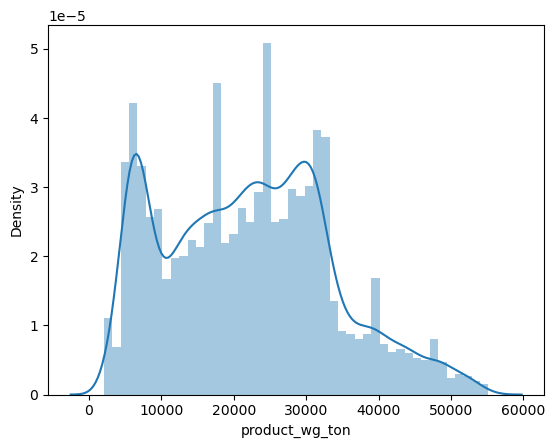

In [11]:
sns.distplot(data['product_wg_ton'])

<Axes: >

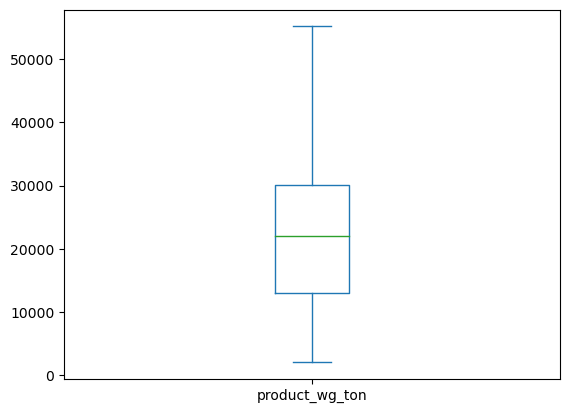

In [12]:
data['product_wg_ton'].plot(kind='box')

Target varaible is nicely distributed and does not contain any outliers

### 3.2.3 Univariate Analysis 

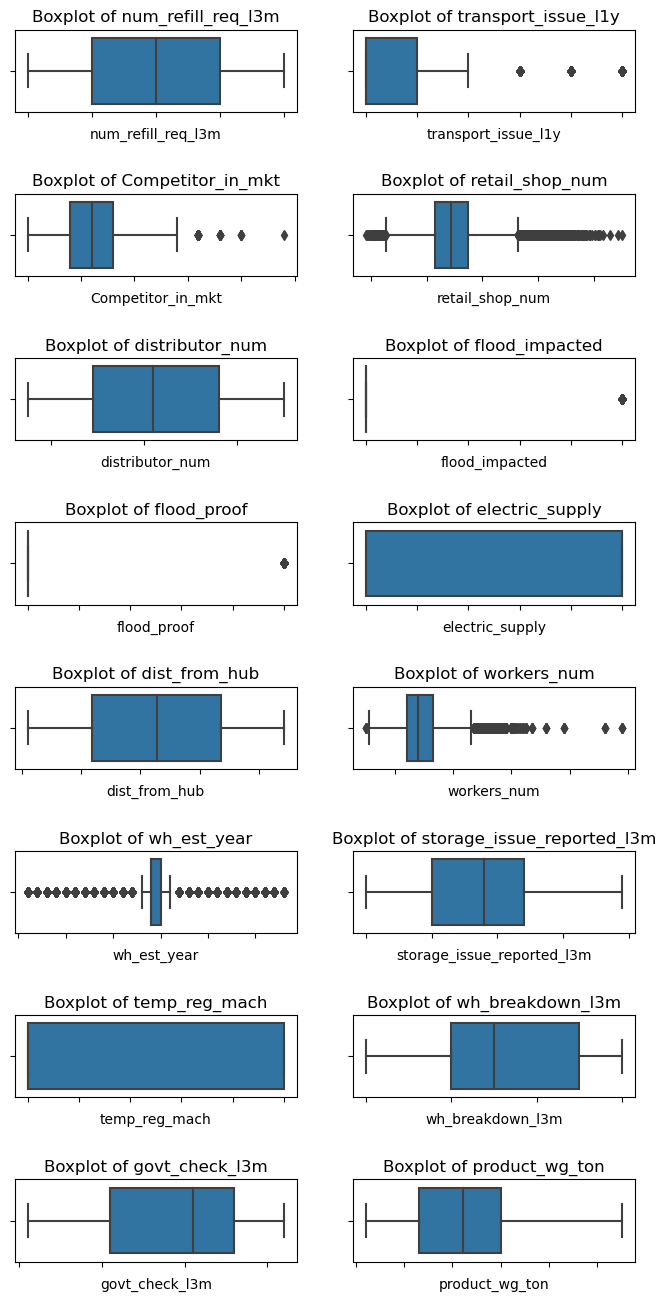

In [13]:
columns_to_plot_numerical = [
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'flood_impacted',
    'flood_proof',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'wh_est_year',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m',
    'product_wg_ton']

# Create a single large subplot to display all boxplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 16))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs
for i, column in enumerate(columns_to_plot_numerical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

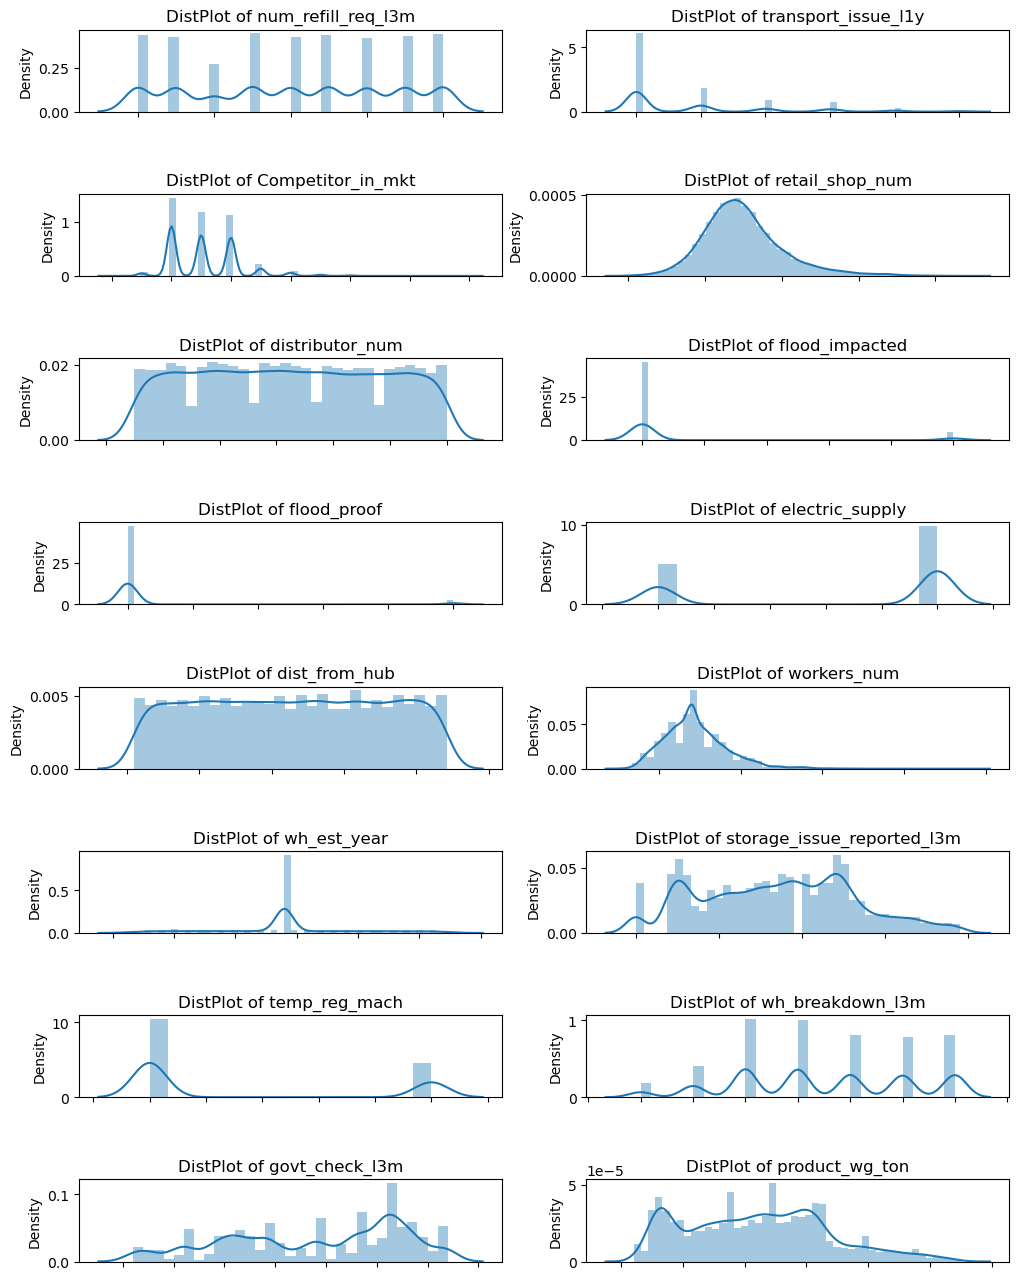

In [14]:
columns_to_plot_numerical = [
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'flood_impacted',
    'flood_proof',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'wh_est_year',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m',
    'product_wg_ton']

# Create a single large subplot to display all boxplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs
for i, column in enumerate(columns_to_plot_numerical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.distplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'DistPlot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

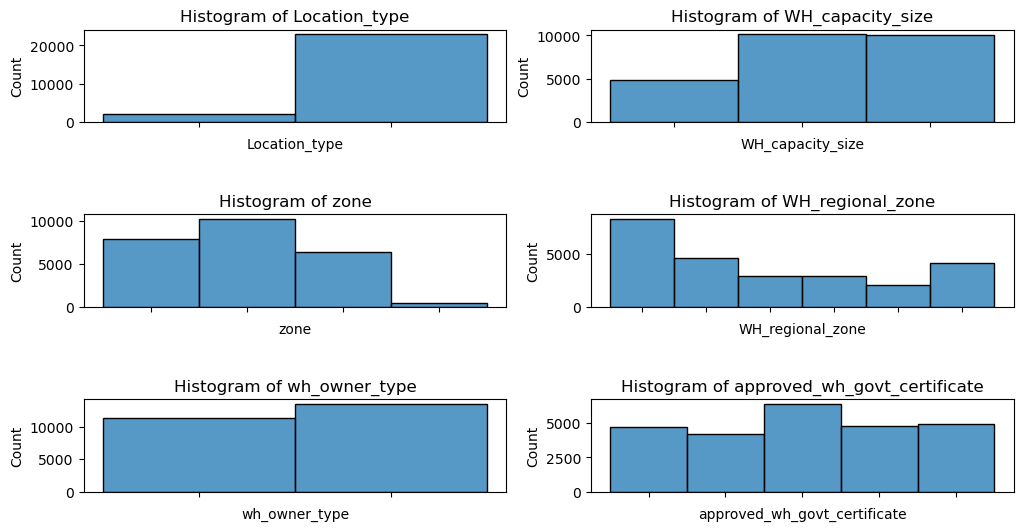

In [15]:
columns_to_plot_categorical = [
    'Location_type',
    'WH_capacity_size',
    'zone',
    'WH_regional_zone',
    'wh_owner_type',
    'approved_wh_govt_certificate']

# Create a single large subplot to display all histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn histogram graphs
for i, column in enumerate(columns_to_plot_categorical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.histplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

#### Looking more into categorical variables

In [16]:
def check_value_count_for_categorical_data(column):
    print("value_count for '" ,column, "':\n", data[column].value_counts(), "\n\n-------------------------------------\n\n" )

In [17]:
for col in columns_to_plot_categorical:
    check_value_count_for_categorical_data(col)

value_count for ' Location_type ':
 Rural    22957
Urban     2043
Name: Location_type, dtype: int64 

-------------------------------------


value_count for ' WH_capacity_size ':
 Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64 

-------------------------------------


value_count for ' zone ':
 North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64 

-------------------------------------


value_count for ' WH_regional_zone ':
 Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64 

-------------------------------------


value_count for ' wh_owner_type ':
 Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64 

-------------------------------------


value_count for ' approved_wh_govt_certificate ':
 C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64 

------------------

##### Observation from Univariate Analysis

Many columns have ouliers present and distribution is also skewed for many features

### 3.2.4 Bi-variate Analysis

<Axes: xlabel='Location_type', ylabel='product_wg_ton'>

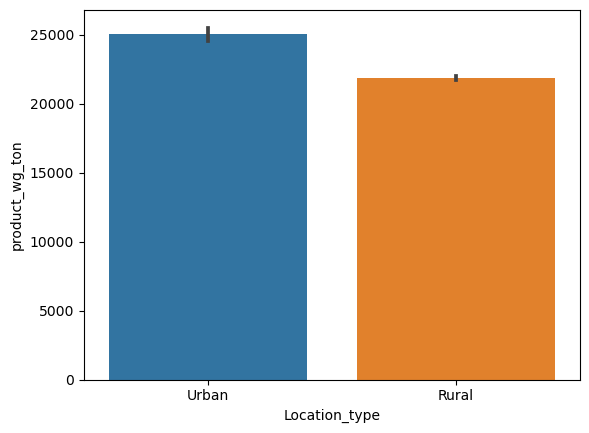

In [18]:
sns.barplot(x='Location_type',y='product_wg_ton',data=data)

<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

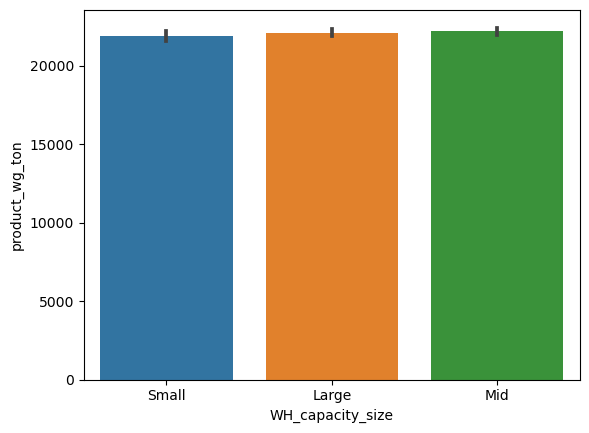

In [19]:
sns.barplot(x='WH_capacity_size',y='product_wg_ton',data=data)

<Axes: xlabel='zone', ylabel='product_wg_ton'>

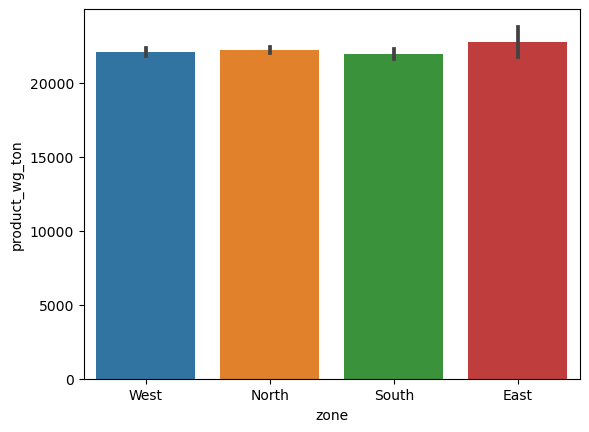

In [20]:
sns.barplot(x='zone',y='product_wg_ton',data=data)

<Axes: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

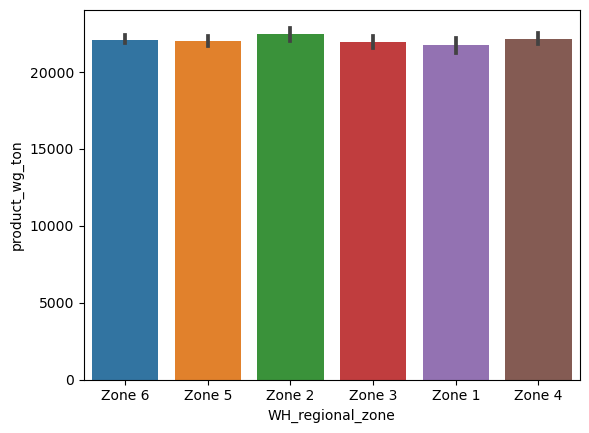

In [21]:
sns.barplot(x='WH_regional_zone',y='product_wg_ton',data=data)

<Axes: xlabel='wh_owner_type', ylabel='product_wg_ton'>

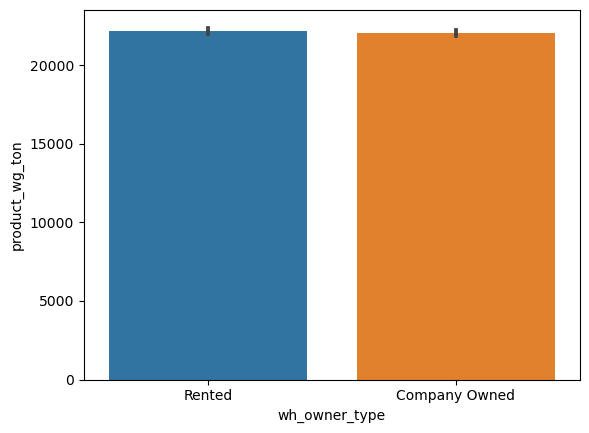

In [22]:
sns.barplot(x='wh_owner_type',y='product_wg_ton',data=data)

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

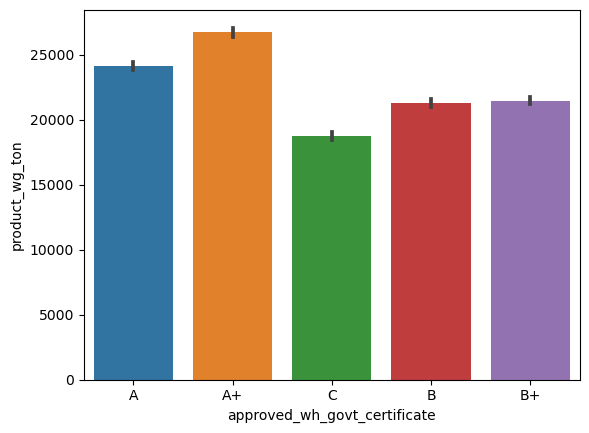

In [23]:
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton',data=data)

<Axes: xlabel='Location_type', ylabel='product_wg_ton'>

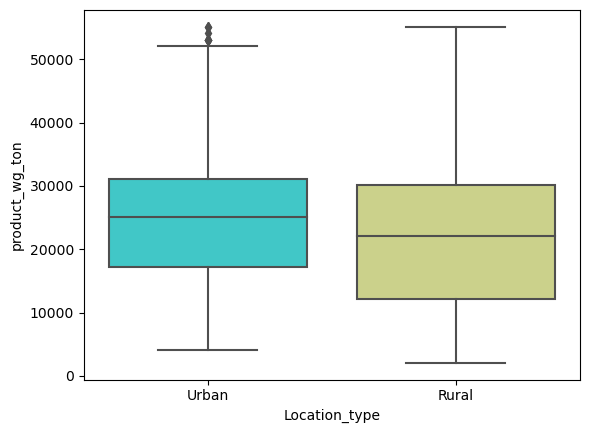

In [24]:
sns.boxplot(x='Location_type',y='product_wg_ton',data=data,palette='rainbow')

<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

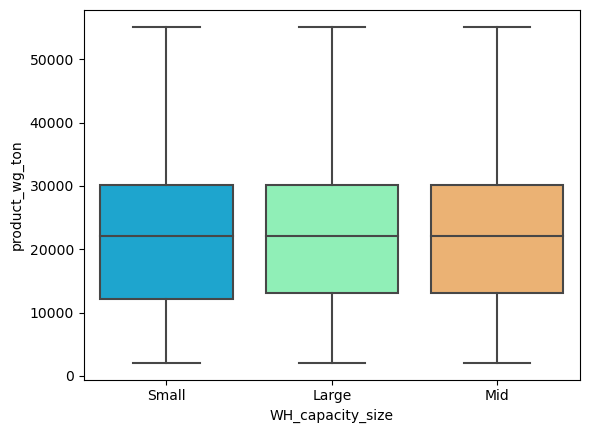

In [25]:
sns.boxplot(x='WH_capacity_size',y='product_wg_ton',data=data,palette='rainbow')

<Axes: xlabel='zone', ylabel='product_wg_ton'>

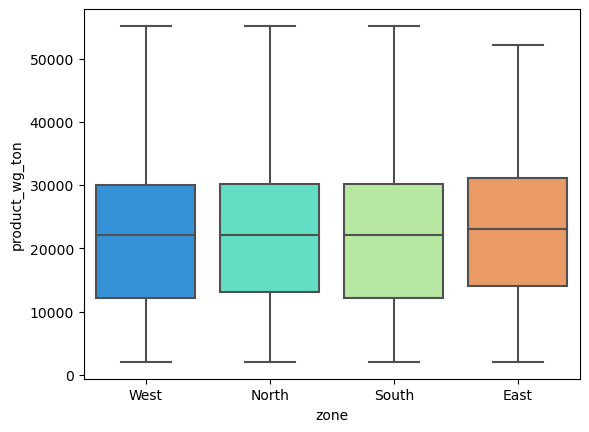

In [26]:
sns.boxplot(x='zone',y='product_wg_ton',data=data,palette='rainbow')

<Axes: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

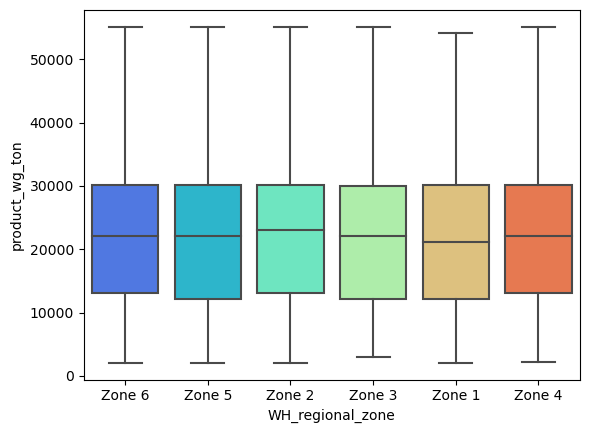

In [27]:
sns.boxplot(x='WH_regional_zone',y='product_wg_ton',data=data,palette='rainbow')

<Axes: xlabel='wh_owner_type', ylabel='product_wg_ton'>

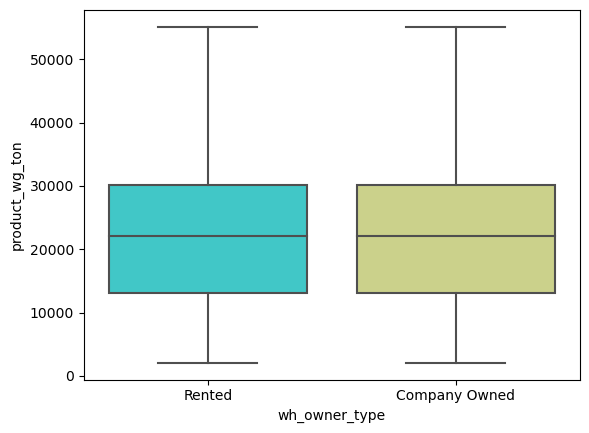

In [28]:
sns.boxplot(x='wh_owner_type',y='product_wg_ton',data=data,palette='rainbow')

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

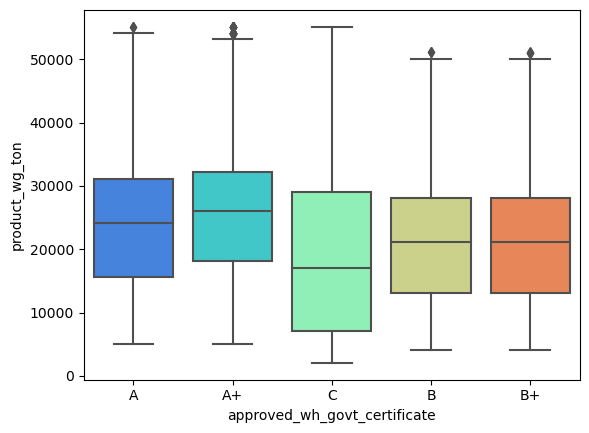

In [29]:
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton',data=data,palette='rainbow')

Not much be can be interpreted for categorical variables with respect to target variable as all of these are fairly distibuted

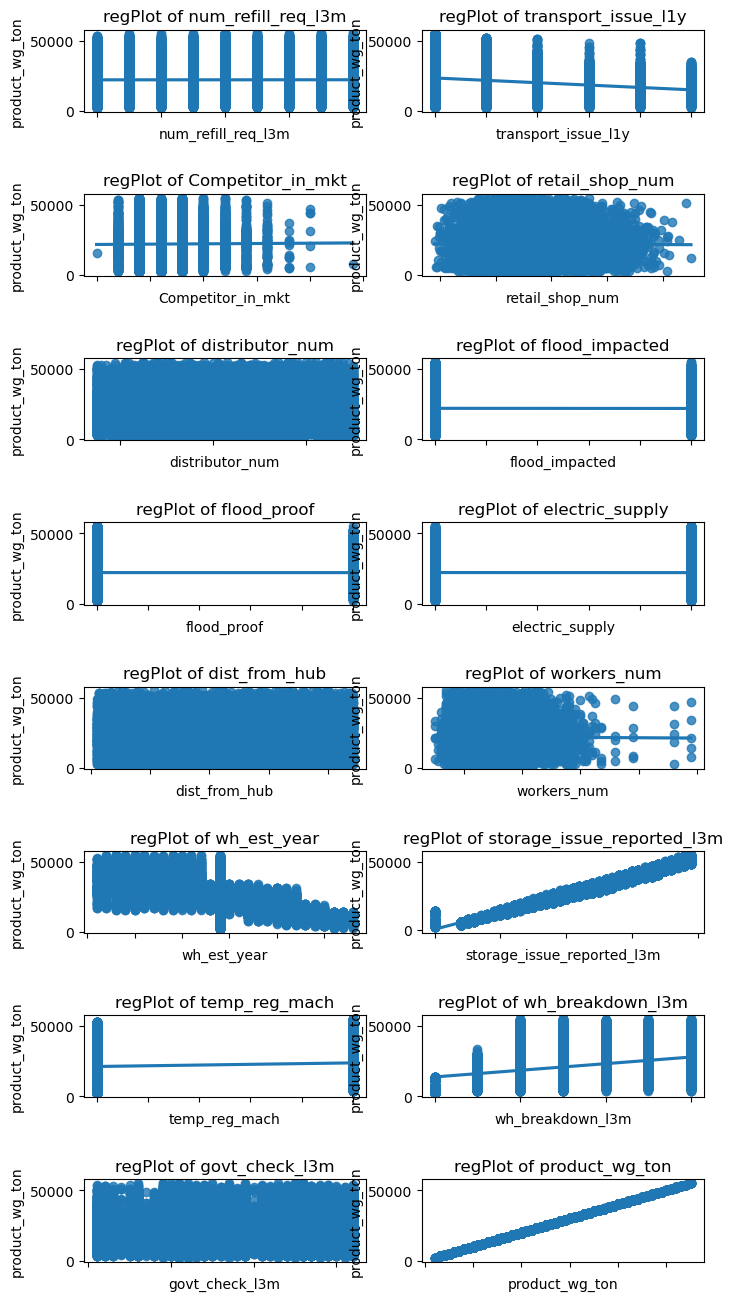

In [30]:
columns_to_plot_numerical = [
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'flood_impacted',
    'flood_proof',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'wh_est_year',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m',
    'product_wg_ton']

# Create a single large subplot to display all regplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 16))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs
for i, column in enumerate(columns_to_plot_numerical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.regplot(x=column,y='product_wg_ton',data=data, ax=axes[row, col])
    axes[row, col].set_title(f'regPlot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

### 3.2.5 Multivariate analysis

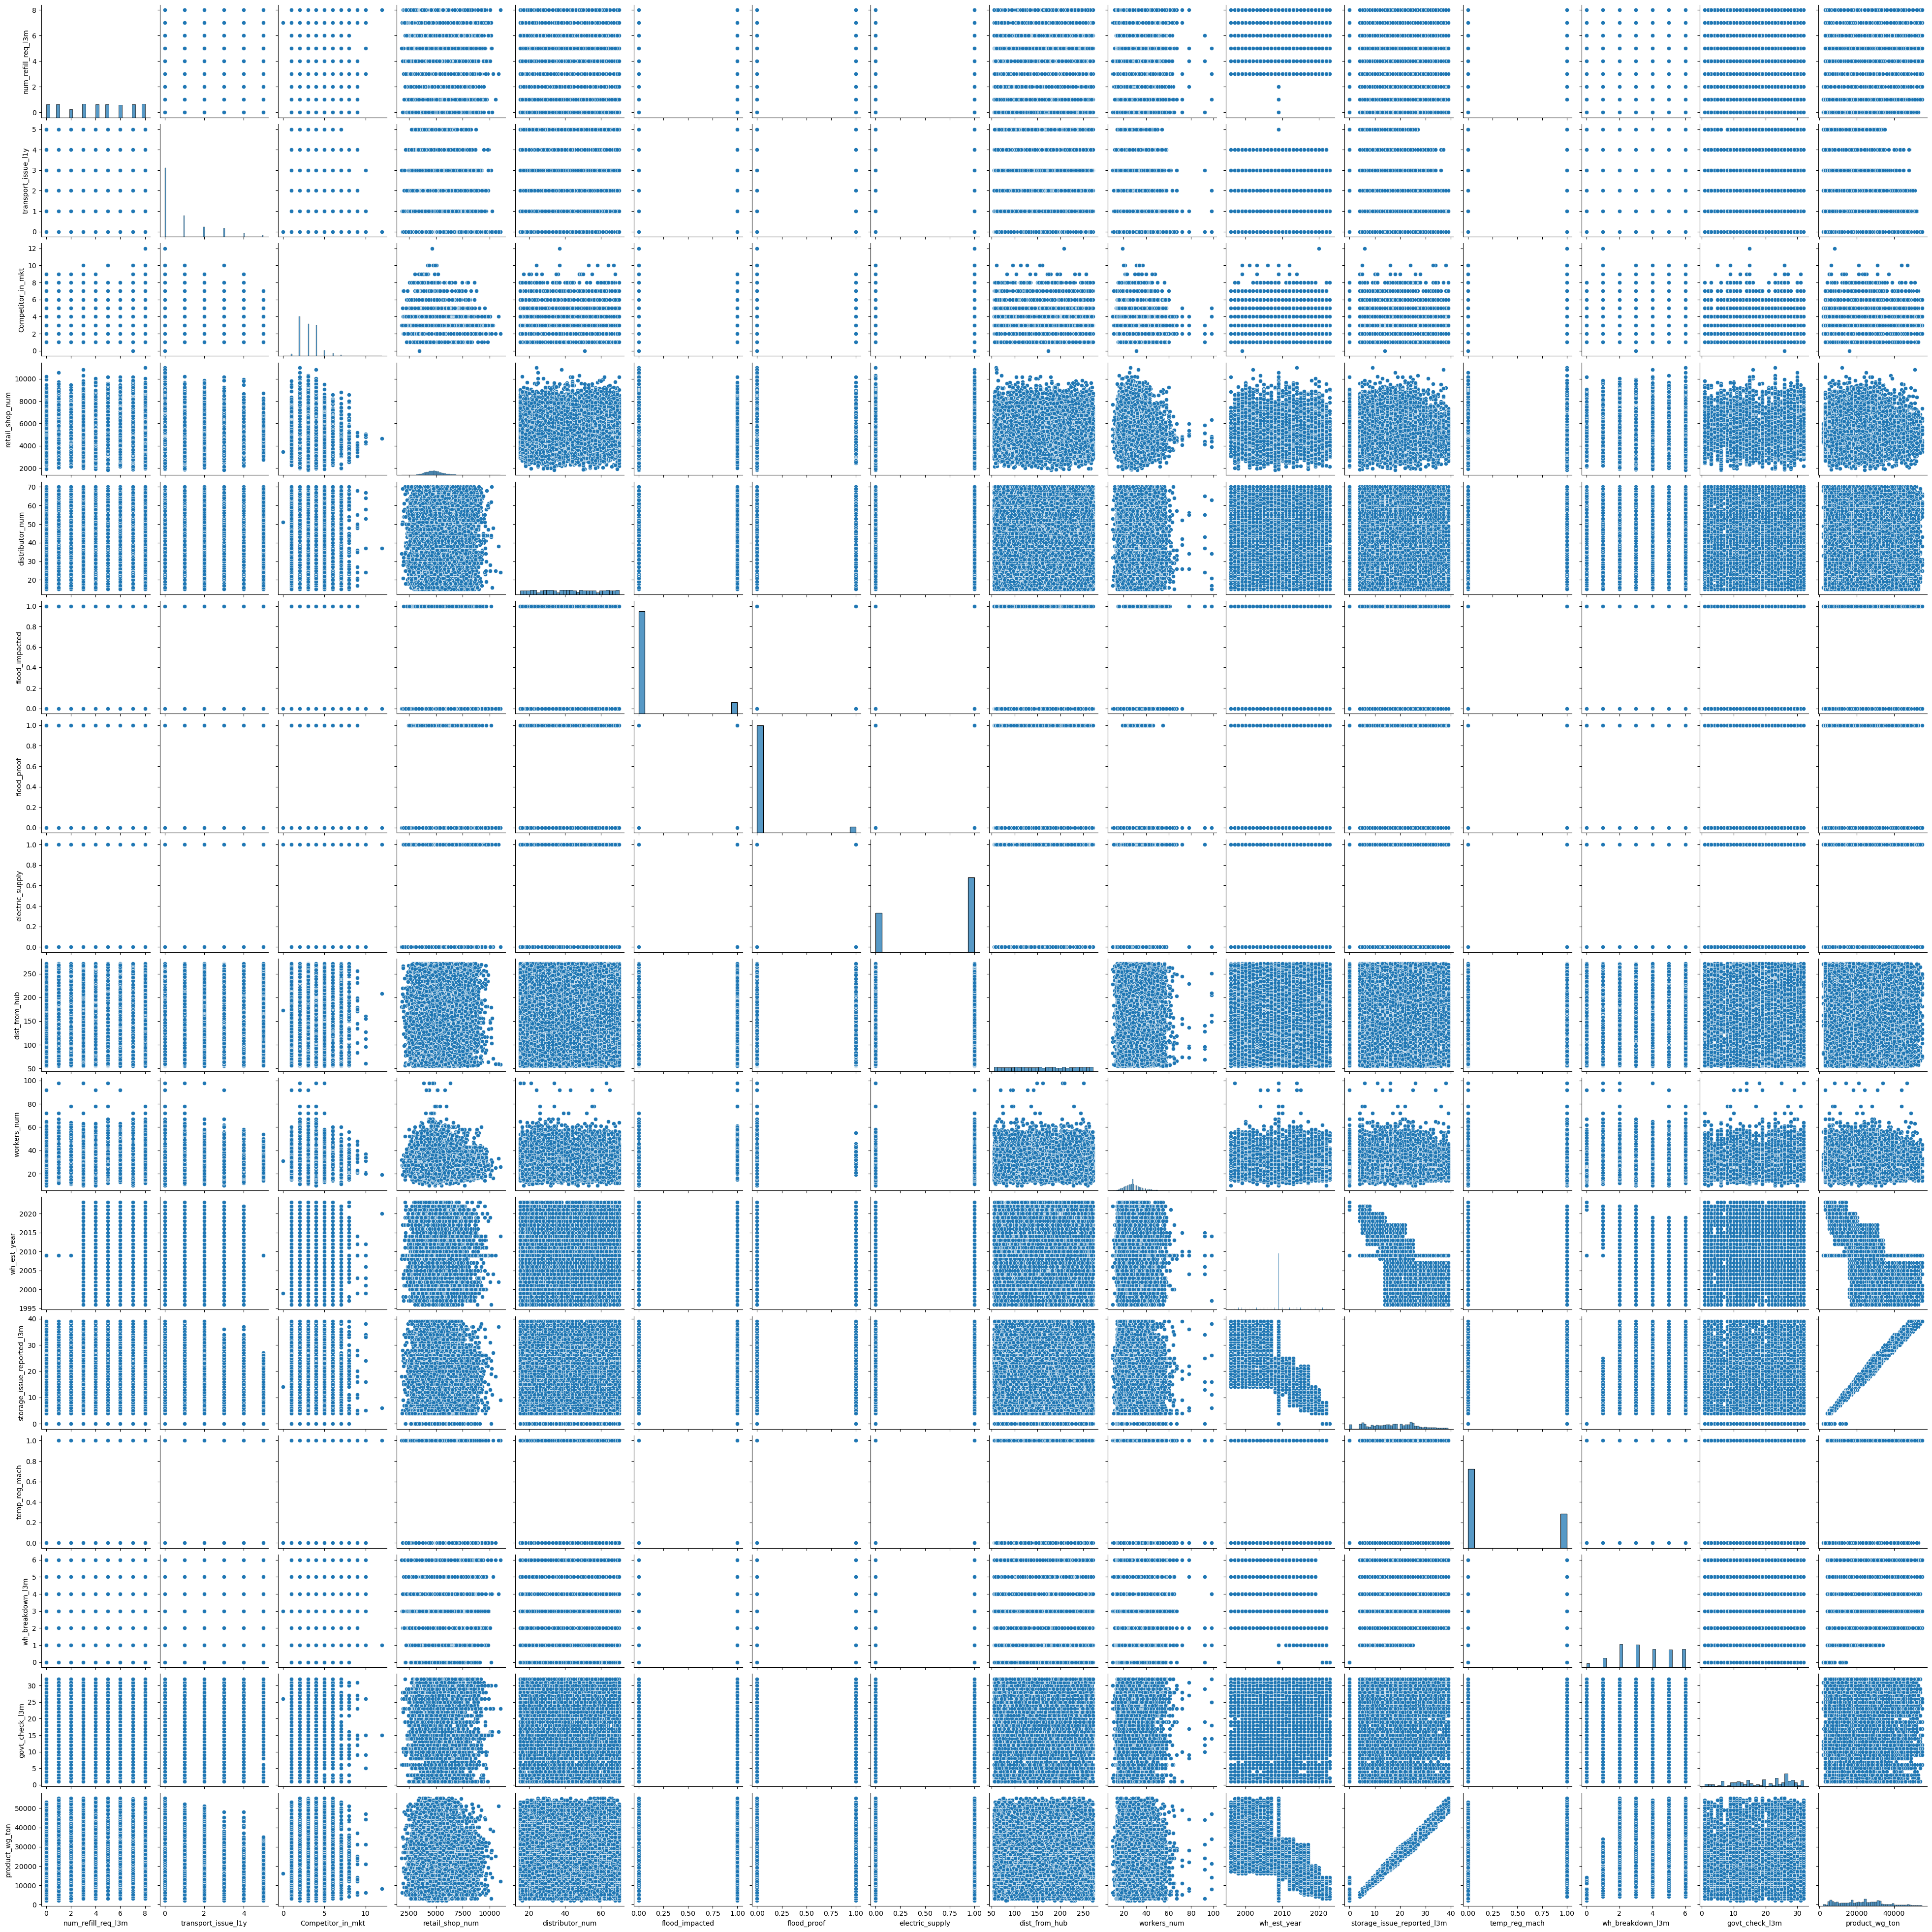

In [31]:
sns.pairplot(data)

<Axes: >

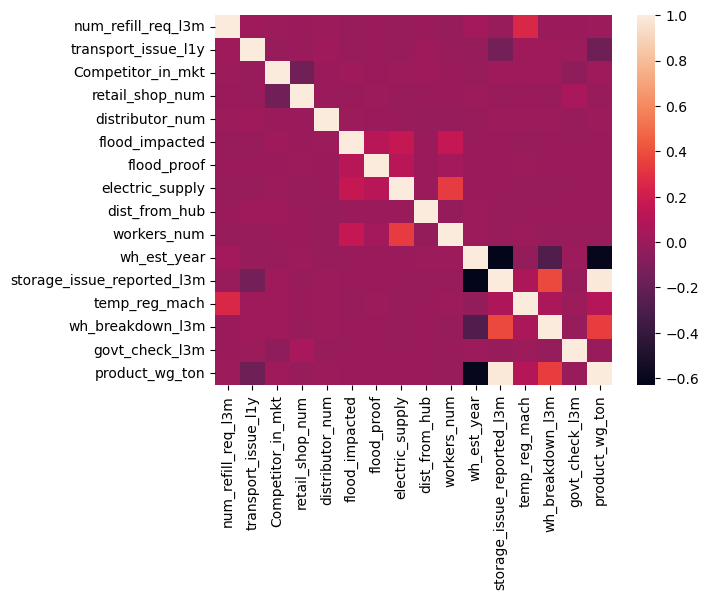

In [32]:
sns.heatmap(data.corr())

#### Inference from Multivariate Analysis

- **wh_est_year** has **negative correlation** with target variable
- **storage_issue_reported_l3m** is highly **positively correlated** with target variable
- **wh_breakdown_l3m** has some correlation with target variable

# 4 Preprocessing

## 4.1 Outlier Treatment

In [33]:
def treat_outlier_for_numerical_features(column):
    Q1=np.nanpercentile(data[column],25)
    Q2=np.nanpercentile(data[column],50)
    Q3=np.nanpercentile(data[column],75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    data[column] = np.where(data[column] > upper_limit, upper_limit,data[column])
    data[column] = np.where(data[column] < lower_limit, lower_limit,data[column])

In [34]:
for col in columns_to_plot_numerical:
    treat_outlier_for_numerical_features(col)

Again check the distribution of numerical features after treatment of outliers

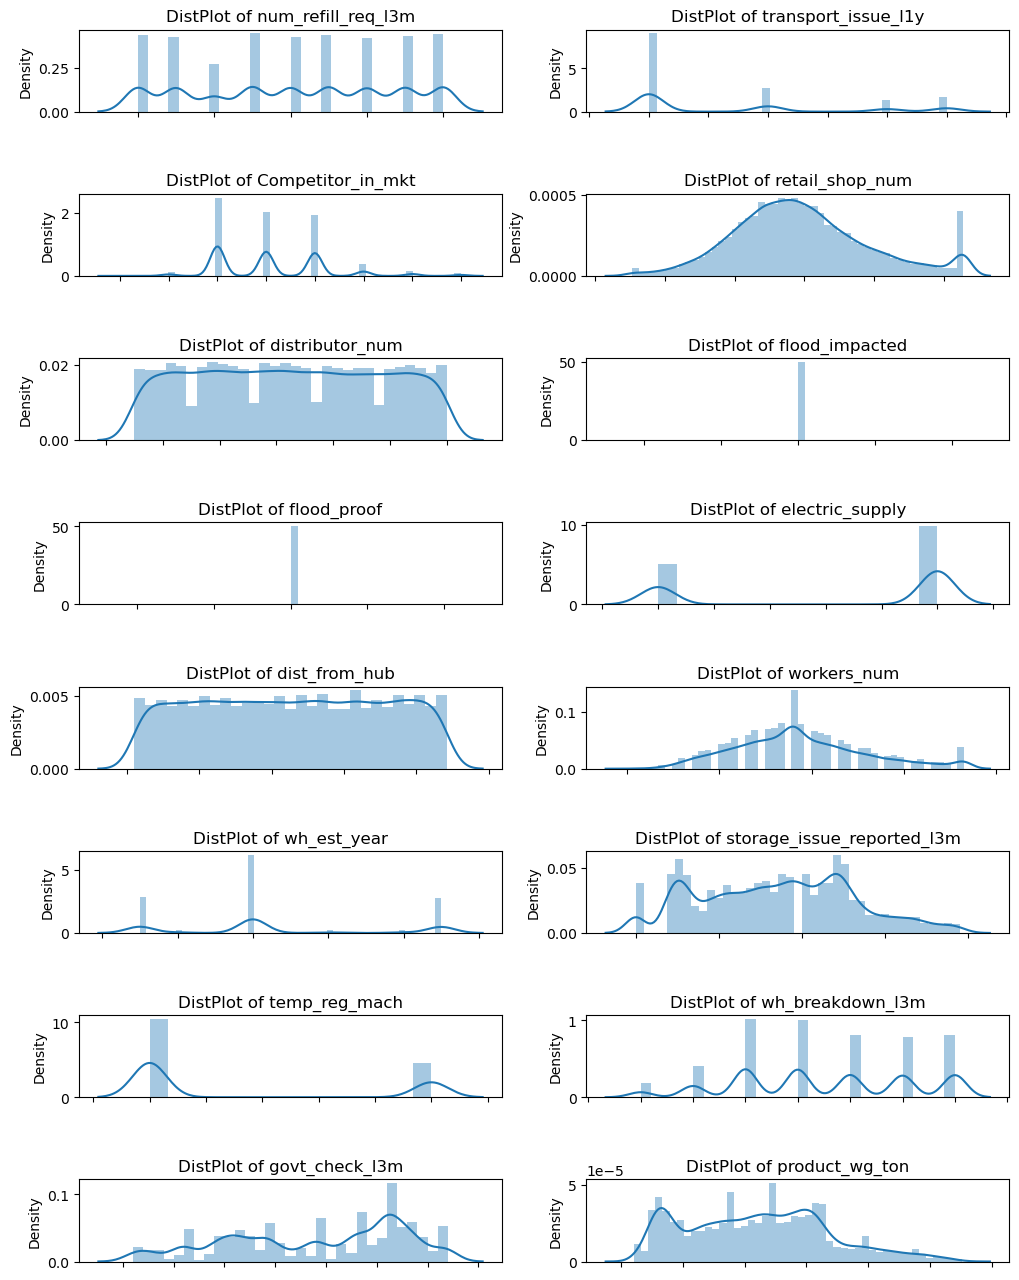

In [35]:
# Create a single large subplot to display all boxplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs
for i, column in enumerate(columns_to_plot_numerical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.distplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'DistPlot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

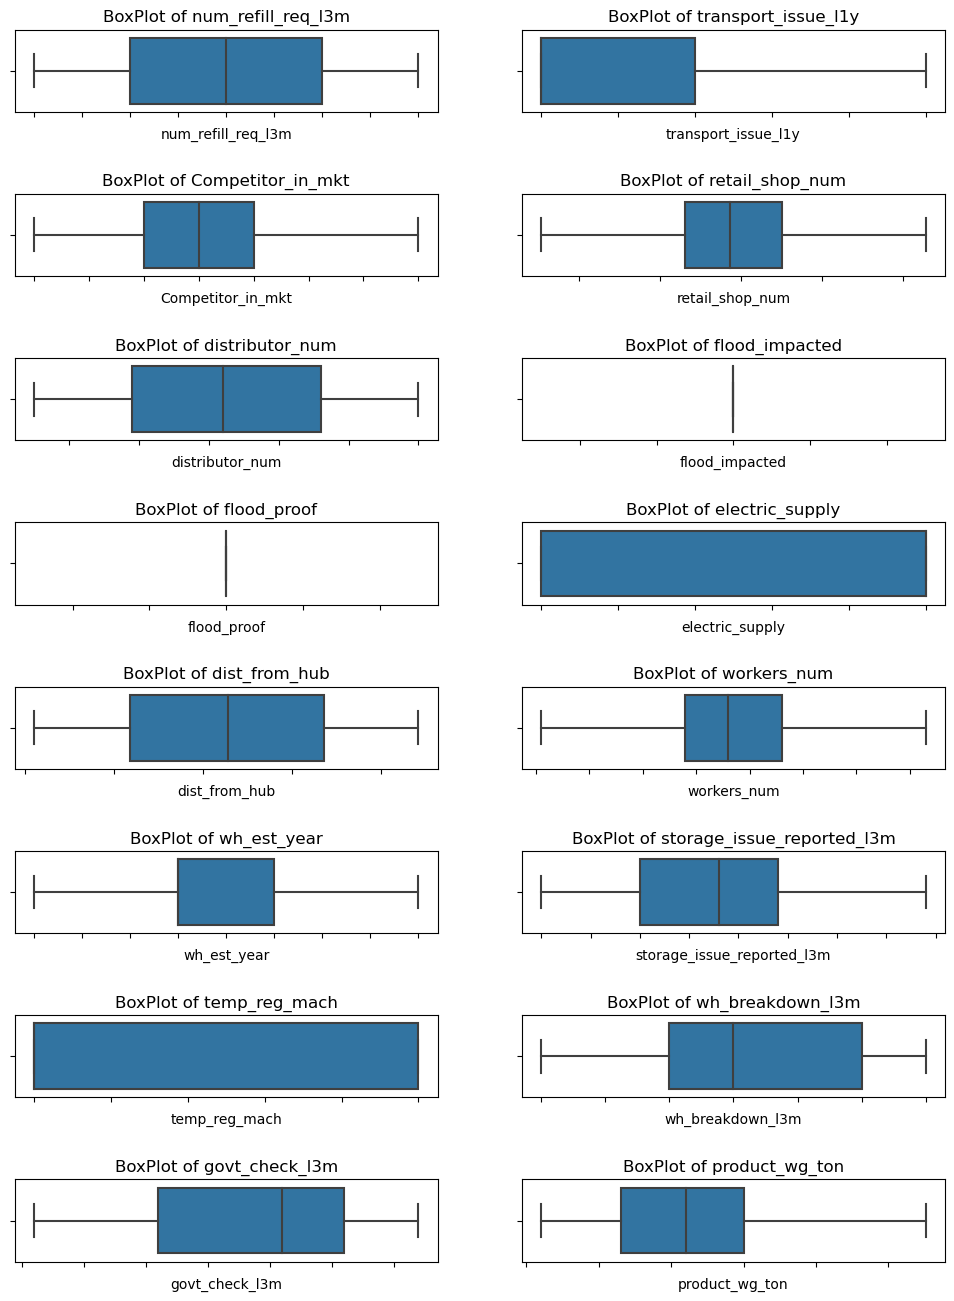

In [36]:
# Create a single large subplot to display all boxplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn boxplot graphs
for i, column in enumerate(columns_to_plot_numerical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'BoxPlot of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

In [37]:
data.nunique()

Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 4
Competitor_in_mkt                   8
retail_shop_num                  4151
wh_owner_type                       2
distributor_num                    56
flood_impacted                      1
flood_proof                         1
electric_supply                     2
dist_from_hub                     217
workers_num                        38
wh_est_year                         6
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4561
dtype: int64

## 4.2 Creating a list of features that are not needed

In [38]:
removed_features = []

Adding below features to list removed_features:
   - **Ware_house_ID**:  ID of warehouse, it does not contribute to our solution
   - **WH_Manager_ID**:  ID of manager, it does not contribute to our solution
   - **flood_impacted**: This feature has only one unique value, therefore it does not contribute to our solution
   - **flood_proof**:    This feature has only one unique value, therefore it does not contribute to our solution

In [39]:
removed_features.extend(['Ware_house_ID', 'WH_Manager_ID', 'flood_impacted', 'flood_proof'])

Analysing **wh_est_year**

In [40]:
data['wh_est_year'].value_counts()

2009.0    12366
2007.5     5653
2011.5     5487
2008.0      509
2010.0      499
2011.0      486
Name: wh_est_year, dtype: int64

Converting **wh_est_year** to time(in years) from current year

In [41]:
data['age_of_est'] = pd.datetime.now().year - data['wh_est_year'] 

Adding **wh_est_year** to removed_features list as a new column of **age_of_est** has been added

In [42]:
removed_features.append('wh_est_year')

### 4.2.1 Dropping the features from data which are in removed_features list

In [43]:
data = data.drop(removed_features, axis = 1)

check_data(data)

Number of data points :  25000
Number of features/columns :  20 
 ----------------------------------------------------------------------------------------------------
Features :  ['Location_type' 'WH_capacity_size' 'zone' 'WH_regional_zone'
 'num_refill_req_l3m' 'transport_issue_l1y' 'Competitor_in_mkt'
 'retail_shop_num' 'wh_owner_type' 'distributor_num' 'electric_supply'
 'dist_from_hub' 'workers_num' 'storage_issue_reported_l3m'
 'temp_reg_mach' 'approved_wh_govt_certificate' 'wh_breakdown_l3m'
 'govt_check_l3m' 'product_wg_ton' 'age_of_est']


### 4.2.2 Encoding for Categorical Variables

categorical columns = [
 - 'Location_type',
 - 'WH_capacity_size',
 - 'zone',
 - 'WH_regional_zone',
 - 'wh_owner_type',
 - 'approved_wh_govt_certificate'
 
 ]

In [44]:
for col in columns_to_plot_categorical:
    check_value_count_for_categorical_data(col)

value_count for ' Location_type ':
 Rural    22957
Urban     2043
Name: Location_type, dtype: int64 

-------------------------------------


value_count for ' WH_capacity_size ':
 Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64 

-------------------------------------


value_count for ' zone ':
 North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64 

-------------------------------------


value_count for ' WH_regional_zone ':
 Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64 

-------------------------------------


value_count for ' wh_owner_type ':
 Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64 

-------------------------------------


value_count for ' approved_wh_govt_certificate ':
 C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64 

------------------

### 4.2.3 One-Hot Encoding

Following variables can be encoded using one-hot encoding as they do not have any ordinal nature:
   - Location_type
   - zone
   - WH_regional_zone
   - wh_owner_type
    

In [45]:
data=pd.get_dummies(data, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type'],drop_first=True)

### 4.2.4 Label Encoding

Following variables can be encoded using label encoding as they have ordinal nature:
   - WH_capacity_size
   - approved_wh_govt_certificate

In [46]:
def label_encoding(column):
    label_encoder = preprocessing.LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    
for col in ['WH_capacity_size', 'approved_wh_govt_certificate']:
    label_encoding(col)

#### Checking the data again after preprocessing and encoding

In [47]:
check_data(data)
data.head()

Number of data points :  25000
Number of features/columns :  26 
 ----------------------------------------------------------------------------------------------------
Features :  ['WH_capacity_size' 'num_refill_req_l3m' 'transport_issue_l1y'
 'Competitor_in_mkt' 'retail_shop_num' 'distributor_num' 'electric_supply'
 'dist_from_hub' 'workers_num' 'storage_issue_reported_l3m'
 'temp_reg_mach' 'approved_wh_govt_certificate' 'wh_breakdown_l3m'
 'govt_check_l3m' 'product_wg_ton' 'age_of_est' 'Location_type_Urban'
 'zone_North' 'zone_South' 'zone_West' 'WH_regional_zone_Zone 2'
 'WH_regional_zone_Zone 3' 'WH_regional_zone_Zone 4'
 'WH_regional_zone_Zone 5' 'WH_regional_zone_Zone 6'
 'wh_owner_type_Rented']


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 2                 3.0                  1.0   
1                 0                 0.0                  0.0   
2                 1                 1.0                  0.0   
3                 1                 7.0                  2.5   
4                 0                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  electric_supply  \
0                2.0           4651.0             24.0              1.0   
1                4.0           6217.0             47.0              1.0   
2                4.0           4306.0             64.0              0.0   
3                2.0           6000.0             50.0              0.0   
4                2.0           4740.0             42.0              1.0   

   dist_from_hub  workers_num  storage_issue_reported_l3m  ...  \
0           91.0         29.0                        13.0  ...   
1          210.0         31.0                         4.0  ...   
2          161.0         37.0                        17.0  ...   
3          103.0         21.0                        17.0  ...   
4          112.0         25.0                        18.0  ...   

   Location_type_Urban  zone_North  zone_South  zone_West  \
0                    1           0           0          1   
1                    0           1           0          0   
2                    0           0           1          0   
3                    0           1           0          0   
4                    0           1           0          0   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        0   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  wh_owner_type_Rented  
0                        0                        1                     1  
1                        1                        0                     0  
2                        0                        0                     0  
3                        0                        0                     1  
4                        1                        0                     0  

[5 rows x 26 columns]

### 4.2.5 Train-Test Split

#### Remove target col from feature dataframe

In [48]:
X = data.drop(['product_wg_ton'], axis=1)
y = data['product_wg_ton']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20000, 25)
Dimension of X_test: (5000, 25)


### 4.2.6 Standardisation after Train Test Split

In [50]:
non_categorical_columns = [   
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m',
    'age_of_est']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train[non_categorical_columns] = scaler.fit_transform(X_train[non_categorical_columns])

# using same fit params of train data for the test data to avoid data leakage
X_test[non_categorical_columns] = scaler.transform(X_test[non_categorical_columns])

X_train.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
23311                 0           -1.188838             0.372996   
23623                 1            1.496848            -0.715249   
1020                  0            1.496848            -0.715249   
12645                 0            1.496848             0.372996   
1533                  0           -0.037830            -0.715249   

       Competitor_in_mkt  retail_shop_num  distributor_num  electric_supply  \
23311           0.815374        -0.908895         1.033787         0.719661   
23623          -0.083555         1.155974         0.659390         0.719661   
1020            0.815374        -0.891326         0.284994         0.719661   
12645          -0.982485        -0.517210         0.596991         0.719661   
1533            0.815374        -0.145162         0.596991        -1.389544   

       dist_from_hub  workers_num  storage_issue_reported_l3m  ...  \
23311       1.193945    -0.949013                    1.184447  ...   
23623       0.954705     0.171874                    2.165712  ...   
1020       -0.018206    -0.388570                    0.748329  ...   
12645      -0.624282     1.572983                    0.966388  ...   
1533       -0.177700    -1.509457                    0.203182  ...   

       Location_type_Urban  zone_North  zone_South  zone_West  \
23311                    0           0           0          1   
23623                    0           1           0          0   
1020                     0           1           0          0   
12645                    0           0           1          0   
1533                     0           1           0          0   

       WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
23311                        0                        0   
23623                        0                        1   
1020                         0                        0   
12645                        0                        0   
1533                         0                        0   

       WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
23311                        0                        0   
23623                        0                        0   
1020                         0                        0   
12645                        0                        1   
1533                         0                        0   

       WH_regional_zone_Zone 6  wh_owner_type_Rented  
23311                        1                     0  
23623                        0                     1  
1020                         1                     0  
12645                        0                     0  
1533                         1                     1  

[5 rows x 25 columns]

## 4.3 Building different ML Models

In [51]:
def create_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model, ' MAE:', metrics.mean_absolute_error(y_test, pred))
    print('--'*50)
    print(model, ' MSE:', metrics.mean_squared_error(y_test, pred))
    print('--'*50)
    print(model, ' R-Squared:', metrics.r2_score(y_test, pred))
    print('--'*50)
    plt.scatter(y_test,pred)

### 4.3.1 Linear Regression Model

LinearRegression()  MAE: 1305.0637585219738
----------------------------------------------------------------------------------------------------
LinearRegression()  MSE: 3092084.848888917
----------------------------------------------------------------------------------------------------
LinearRegression()  R-Squared: 0.9768902232644651
----------------------------------------------------------------------------------------------------


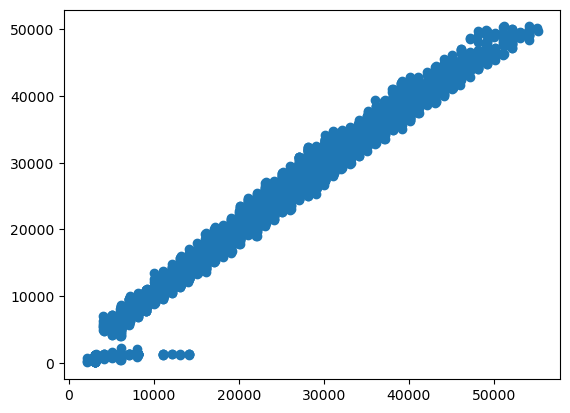

In [52]:
create_and_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)

### 4.3.2 Ridge Regression

Ridge()  MAE: 1305.0903600614636
----------------------------------------------------------------------------------------------------
Ridge()  MSE: 3092083.582655142
----------------------------------------------------------------------------------------------------
Ridge()  R-Squared: 0.9768902327281057
----------------------------------------------------------------------------------------------------


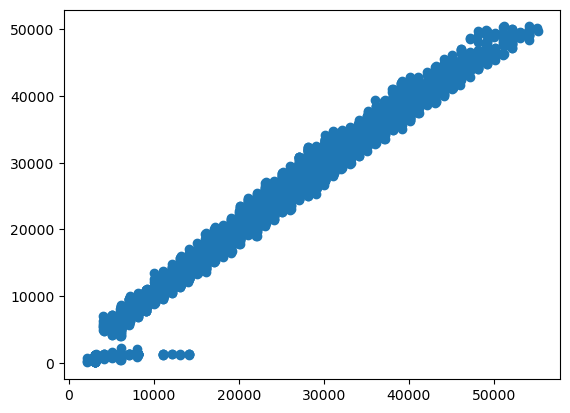

In [53]:
create_and_evaluate_model(Ridge(), X_train, y_train, X_test, y_test)

### 4.3.3 Lasso Regression

Lasso()  MAE: 1304.6605843731234
----------------------------------------------------------------------------------------------------
Lasso()  MSE: 3091144.6068931487
----------------------------------------------------------------------------------------------------
Lasso()  R-Squared: 0.9768972504916149
----------------------------------------------------------------------------------------------------


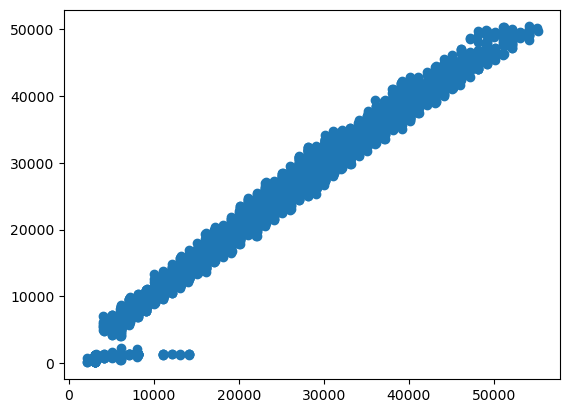

In [54]:
create_and_evaluate_model(linear_model.Lasso(), X_train, y_train, X_test, y_test)

### 4.3.4 SVR

SVR()  MAE: 9141.84064949189
----------------------------------------------------------------------------------------------------
SVR()  MSE: 123401650.03413579
----------------------------------------------------------------------------------------------------
SVR()  R-Squared: 0.07771464223880264
----------------------------------------------------------------------------------------------------


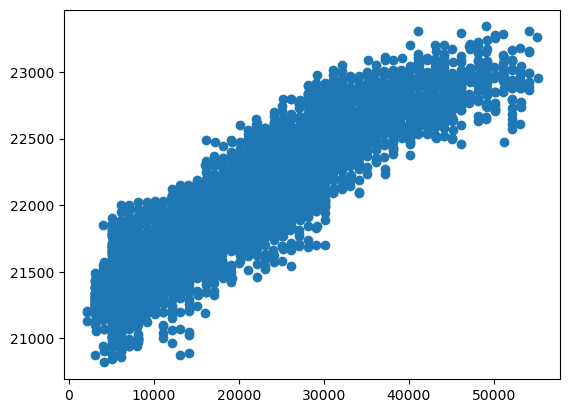

In [55]:
create_and_evaluate_model(SVR(), X_train, y_train, X_test, y_test)

### 4.3.5 RandomForest Regressor

RandomForestRegressor()  MAE: 676.5953559999999
----------------------------------------------------------------------------------------------------
RandomForestRegressor()  MSE: 815512.8850248
----------------------------------------------------------------------------------------------------
RandomForestRegressor()  R-Squared: 0.9939049794494976
----------------------------------------------------------------------------------------------------


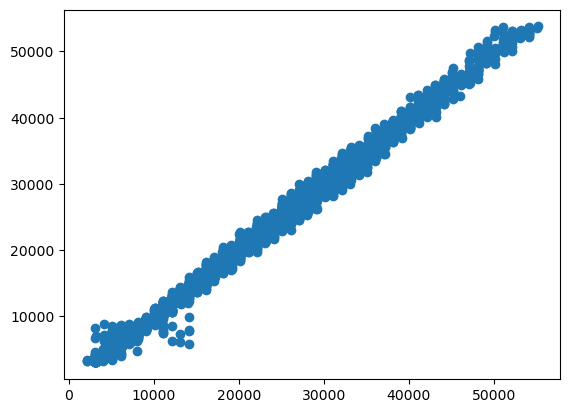

In [56]:
create_and_evaluate_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

### 4.3.6 Gradient Boosting

GradientBoostingRegressor()  MAE: 672.2045468920118
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor()  MSE: 781694.0263508725
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor()  R-Squared: 0.9941577365087633
----------------------------------------------------------------------------------------------------


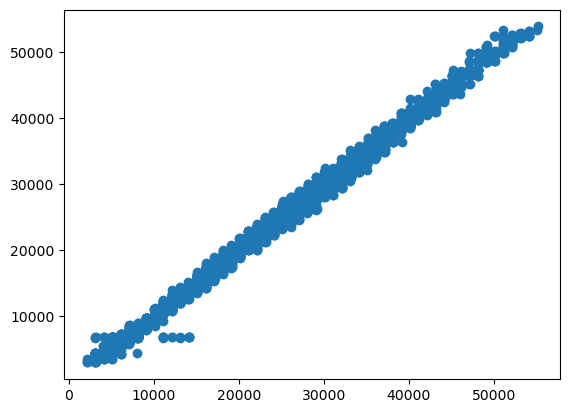

In [57]:
create_and_evaluate_model(ensemble.GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

### 4.3.7 Hyperparameter tuning 

#### 4.3.7.1 Random Forest

In [58]:
grid_params = {
    
    'max_depth': [2, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 25, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestRegressor(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best score:  0.9754264010845872
Best param:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}


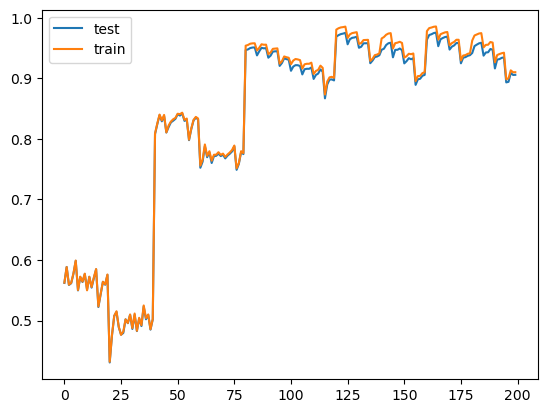

In [59]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Both train and test scores are overlapping, therefore there is no overfitting

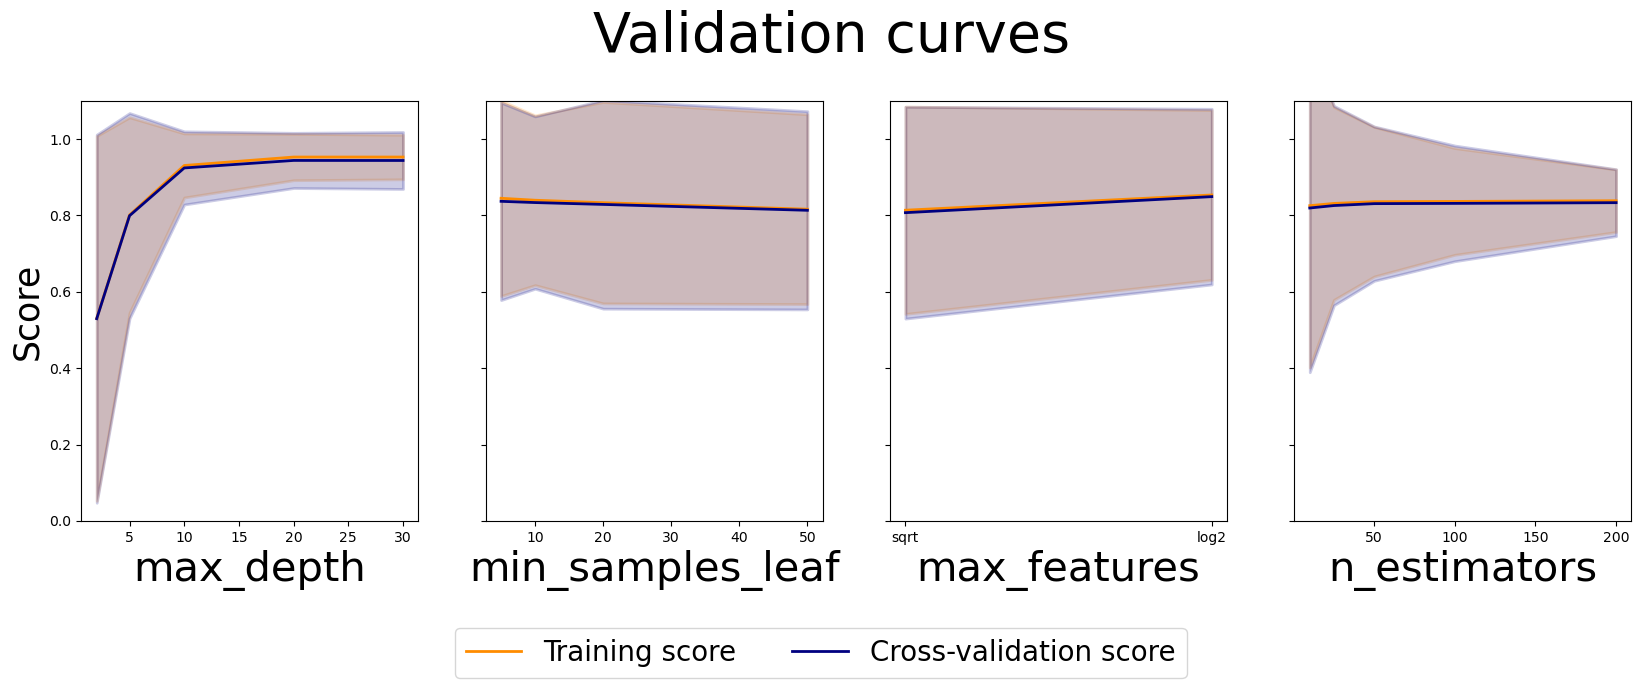

In [60]:
df = pd.DataFrame(grid_search.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']


def pooled_var(stds):
    n = 10 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)
lw = 2

for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    axes[idx].fill_between(param_range,
                grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                grouped_df['mean_train_score'] + grouped_df['std_train_score'],
                alpha=0.2,
                color="darkorange",
                lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    axes[idx].fill_between(param_range,
                    grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'],
                    alpha=0.2,
                    color="navy",
                    lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

##### applying best params of RandomForest

RandomForestRegressor(max_depth=30, min_samples_leaf=5, n_estimators=200)  MAE: 667.0163921721604
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, min_samples_leaf=5, n_estimators=200)  MSE: 791882.9351896433
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, min_samples_leaf=5, n_estimators=200)  R-Squared: 0.9940815861377515
----------------------------------------------------------------------------------------------------


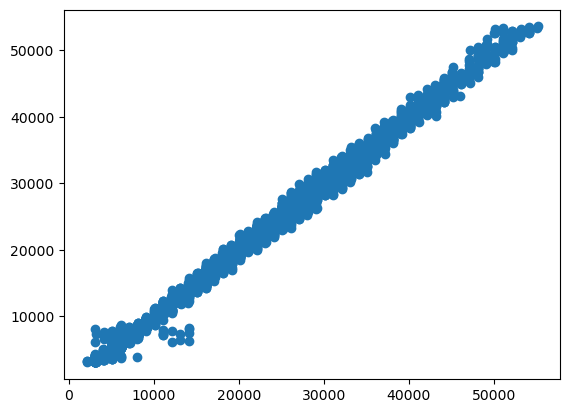

In [61]:
create_and_evaluate_model(RandomForestRegressor(bootstrap=True,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             n_estimators=grid_search.best_params_['n_estimators']), X_train, y_train, X_test, y_test)

#### 4.3.7.2 Gradient Boost

In [62]:
grid_params = {
    
    'max_depth': [3, 7, 9],
    'n_estimators': [10, 25, 50, 100],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best score:  0.9942991864691612
Best param:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


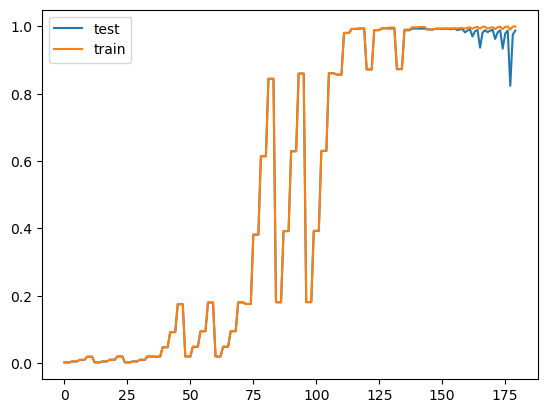

In [63]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

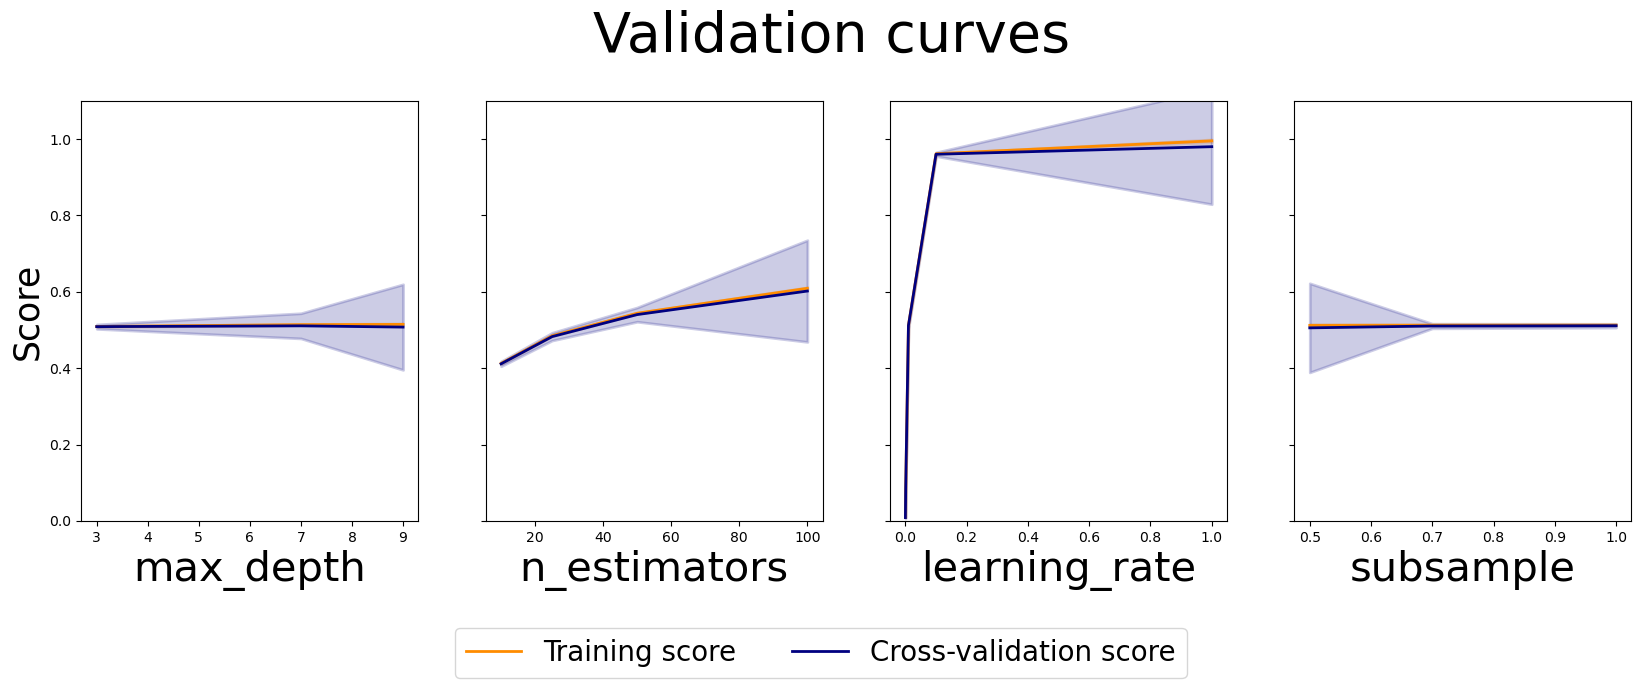

In [64]:
df = pd.DataFrame(grid_search.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']


def pooled_var(stds):
    n = 10 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)
lw = 2

for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    axes[idx].fill_between(param_range,
                grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                grouped_df['mean_train_score'] + grouped_df['std_train_score'],
                alpha=0.2,
                color="darkorange",
                lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    axes[idx].fill_between(param_range,
                    grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'],
                    alpha=0.2,
                    color="navy",
                    lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

#### 4.3.7.3 Ridge Regression

In [65]:
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                         0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                         10.0]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = Ridge(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 23 candidates, totalling 230 fits
Best score:  0.9773318506635986
Best param:  {'alpha': 4.0}


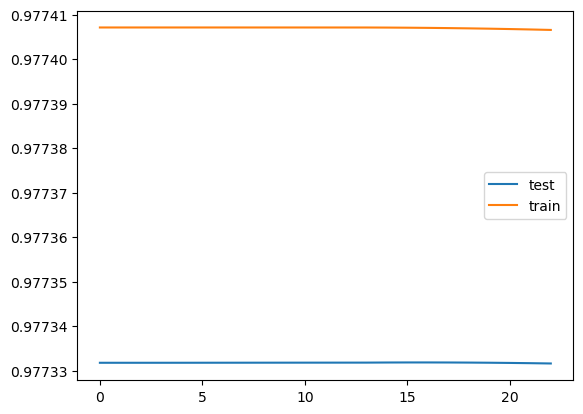

In [66]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [67]:
cv_results = pd.DataFrame(grid_search.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.047504      0.010479         0.003801        0.000870      0.0001   
1       0.023199      0.003869         0.003602        0.000490       0.001   
2       0.019982      0.002251         0.003153        0.000721        0.01   
3       0.021898      0.002257         0.004602        0.000490        0.05   
4       0.023401      0.002764         0.004301        0.000641         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.975877           0.975801           0.977799   
1   {'alpha': 0.001}           0.975877           0.975801           0.977799   
2    {'alpha': 0.01}           0.975877           0.975801           0.977799   
3    {'alpha': 0.05}           0.975877           0.975801           0.977799   
4     {'alpha': 0.1}           0.975877           0.975801           0.977799   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.978145  ...            0.977356             0.97732   
1           0.978145  ...            0.977356             0.97732   
2           0.978145  ...            0.977356             0.97732   
3           0.978145  ...            0.977356             0.97732   
4           0.978145  ...            0.977356             0.97732   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.977418            0.977311            0.977594   
1            0.977418            0.977311            0.977594   
2            0.977418            0.977311            0.977594   
3            0.977418            0.977311            0.977594   
4            0.977418            0.977311            0.977594   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.977421            0.977281            0.977218   
1            0.977421            0.977281            0.977218   
2            0.977421            0.977281            0.977218   
3            0.977421            0.977281            0.977218   
4            0.977421            0.977281            0.977218   

   mean_train_score  std_train_score  
0          0.977407         0.000128  
1          0.977407         0.000128  
2          0.977407         0.000128  
3          0.977407         0.000128  
4          0.977407         0.000128  

[5 rows x 31 columns]

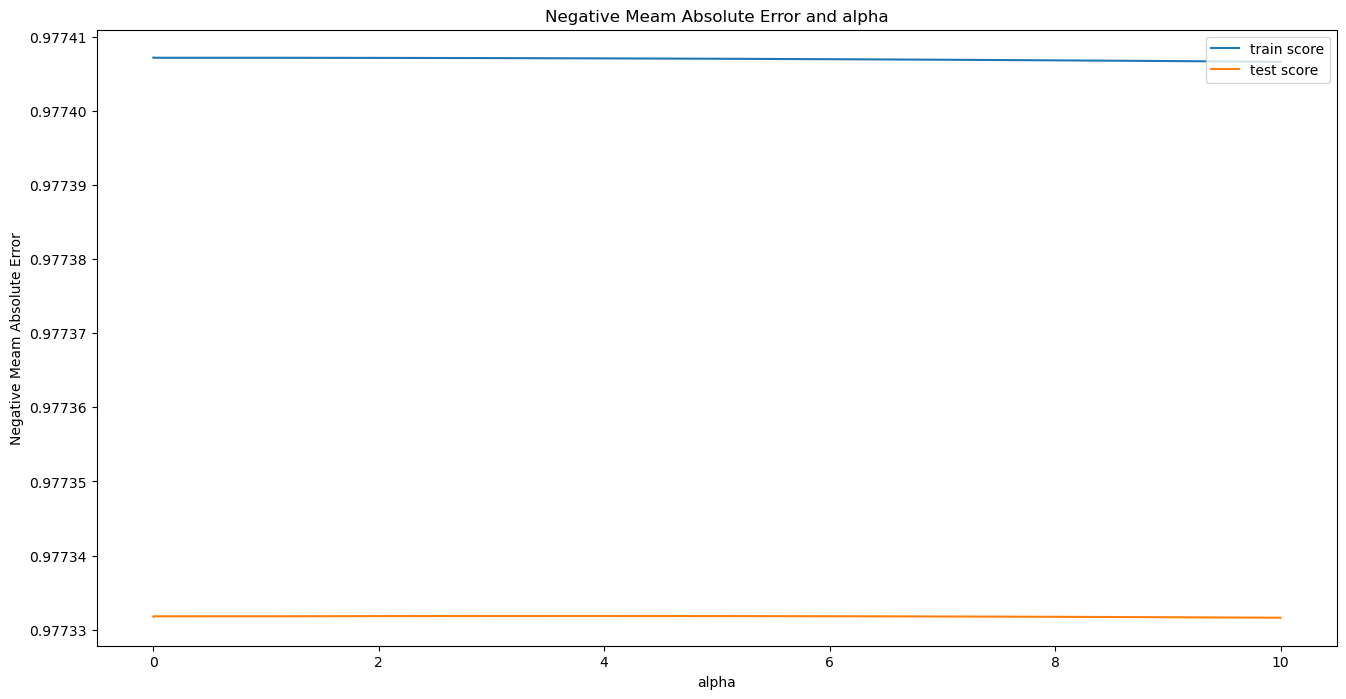

In [68]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

#### 4.7.3.4 Lasso Regression

In [69]:
grid_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                         0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                         10.0]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = linear_model.Lasso(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 23 candidates, totalling 230 fits
Best score:  0.9773457339491258
Best param:  {'alpha': 4.0}


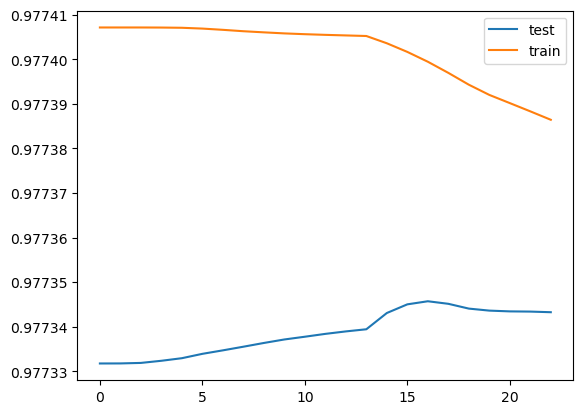

In [70]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [71]:
cv_results = pd.DataFrame(grid_search.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.734598      0.086438         0.008902        0.004036      0.0001   
1       0.561934      0.074719         0.007697        0.001004       0.001   
2       0.393748      0.126575         0.008401        0.005390        0.01   
3       0.332183      0.049632         0.007503        0.000923        0.05   
4       0.262193      0.031822         0.008999        0.004357         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.975877           0.975801           0.977799   
1   {'alpha': 0.001}           0.975877           0.975801           0.977799   
2    {'alpha': 0.01}           0.975877           0.975801           0.977799   
3    {'alpha': 0.05}           0.975878           0.975801           0.977800   
4     {'alpha': 0.1}           0.975878           0.975801           0.977800   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.978145  ...            0.977356             0.97732   
1           0.978145  ...            0.977356             0.97732   
2           0.978145  ...            0.977356             0.97732   
3           0.978145  ...            0.977356             0.97732   
4           0.978145  ...            0.977356             0.97732   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.977418            0.977311            0.977594   
1            0.977418            0.977311            0.977594   
2            0.977418            0.977311            0.977594   
3            0.977418            0.977311            0.977594   
4            0.977418            0.977311            0.977594   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.977421            0.977281            0.977218   
1            0.977421            0.977281            0.977218   
2            0.977421            0.977281            0.977218   
3            0.977421            0.977281            0.977218   
4            0.977421            0.977281            0.977218   

   mean_train_score  std_train_score  
0          0.977407         0.000128  
1          0.977407         0.000128  
2          0.977407         0.000128  
3          0.977407         0.000128  
4          0.977407         0.000128  

[5 rows x 31 columns]

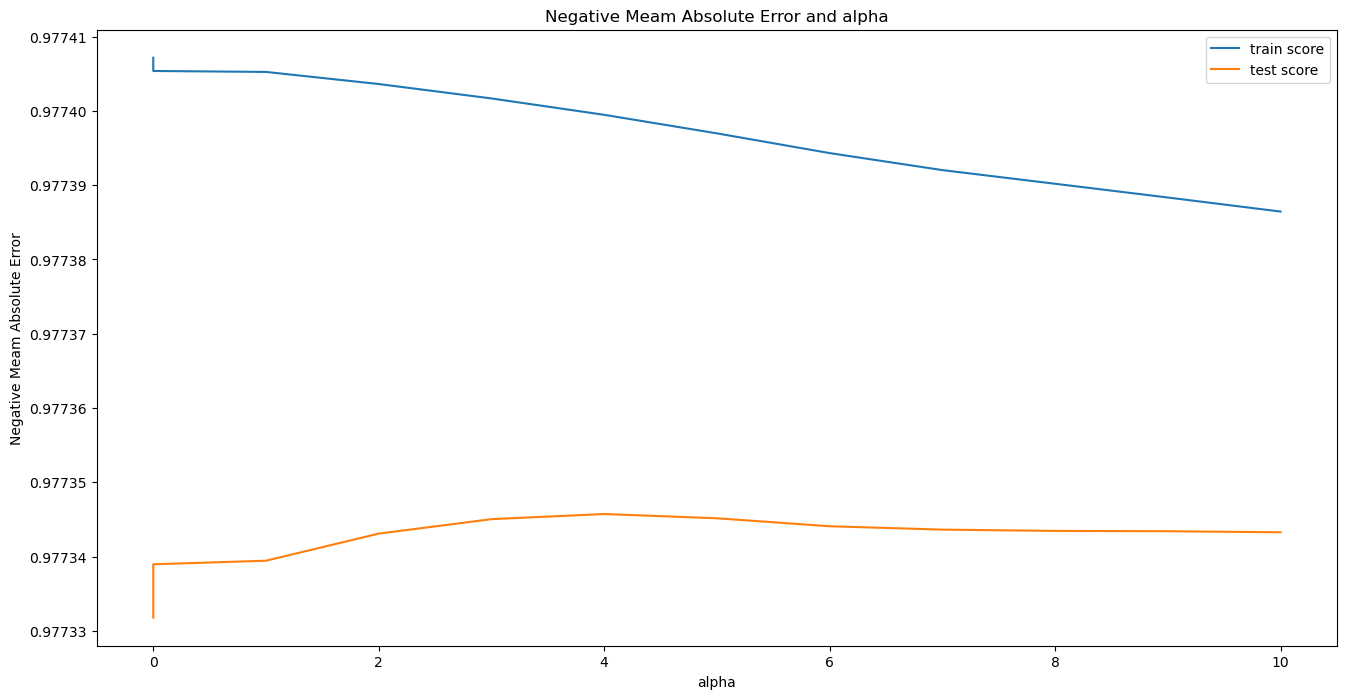

In [72]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In above models, RandomForest looks best. Therefore we will be using that to predict our test classes

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=50)  MAE: 672.7755077169863
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=50)  MSE: 803259.0229254892
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=50)  R-Squared: 0.9939965629703589
----------------------------------------------------------------------------------------------------


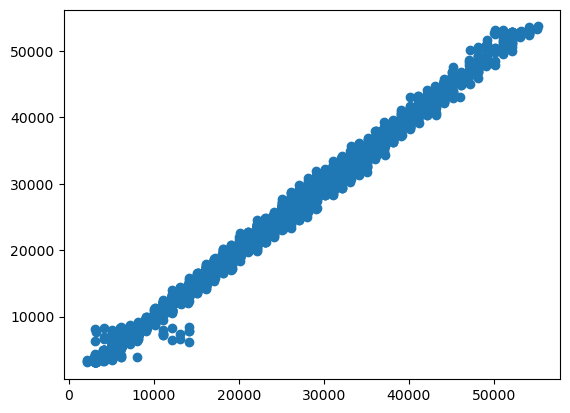

In [73]:
create_and_evaluate_model(RandomForestRegressor(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=5, 
                             n_estimators=50), X_train, y_train, X_test, y_test)